In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as pyo

pio.renderers.default = "browser"

# Load the data
data_train = np.load(
    "/home/rbmg6-mingze/Projects/Emissions-Prediction/data/processed/AGCRN_dynamic/data_train.npy"
)
data_val = np.load(
    "/home/rbmg6-mingze/Projects/Emissions-Prediction/data/processed/AGCRN_dynamic/data_val.npy"
)
data_test = np.load(
    "/home/rbmg6-mingze/Projects/Emissions-Prediction/data/processed/AGCRN_dynamic/data_test.npy"
)

# Slice the first variable from your 3D data and transpose it
data_train_var1 = data_train[:, :, 0].T
data_val_var1 = data_val[:, :, 0].T
data_test_var1 = data_test[:, :, 0].T

# Read the CSV file
df = pd.read_csv(
    "/home/rbmg6-mingze/Projects/Emissions-Prediction/data/interim/node_names.csv",
    header=None,
)
node_names = df[0].tolist()

In [2]:
# Combine the data
data_combined_var1 = np.concatenate(
    [data_train_var1, data_val_var1, data_test_var1], axis=1
)

# Heatmap


## Static


In [ ]:
# Create a list of dates from 2019.1.1 to 2022.12.31
time_points = pd.date_range(start="2019-01-01", end="2022-12-31").tolist()

# Convert time_points to datetime
time_points_dt = pd.to_datetime(time_points)

# Combine the time points
time_points_combined_dt = time_points_dt.tolist()


# Get the indices for the first day of each month
xticks_indices = [i for i, date in enumerate(time_points_combined_dt) if date.day == 1]

# Create xtick labels for the selected indices
xtick_labels = [time_points_combined_dt[i].strftime("%Y-%m-%d") for i in xticks_indices]
# xtick_labels = [date.strftime("%Y-%m-%d") for date in time_points_combined_dt]

In [193]:
# Plot the heatmap for combined data
fig, ax = plt.subplots(figsize=(12, 8))  # Increase the figure size
cax = sns.heatmap(
    data_combined_var1,
    cmap="Reds",
    yticklabels=node_names,
    cbar=False,  # Don't create a default vertical color bar
    ax=ax,
)
ax.set_title("Heatmap of combined data - Variable 1")
ax.set_xlabel("Time")
ax.set_ylabel("Nodes")

# Set xticks location and labels
plt.xticks(
    xticks_indices, xtick_labels, rotation=45
)  # Rotate the x labels for better visibility

# Create a custom color bar
cbar_ax = fig.add_axes([0.9, 0.93, 0.1, 0.02])  # [left, bottom, width, height]
fig.colorbar(cax.get_children()[0], cax=cbar_ax, orientation="horizontal")
cbar_ax.xaxis.set_ticks_position("top")

# Adjust plot margins
plt.subplots_adjust(
    bottom=0.25, left=0.15, right=0.85
)  # Adjust bottom, left and right margins

plt.show()  # Display the plot

## Interactive


In [194]:
# Reverse the order of the node names list and the corresponding values
node_names_reversed = node_names[::-1]
data_combined_var1_reversed = data_combined_var1[::-1]

# Create a DataFrame from your data for easier manipulation with Plotly
df_combined = pd.DataFrame(
    data_combined_var1_reversed,
    columns=[date.strftime("%Y-%m-%d") for date in time_points_combined_dt],
    index=node_names_reversed,
)

# Create the interactive heatmap with Plotly
fig = go.Figure(
    data=go.Heatmap(
        z=df_combined,
        x=df_combined.columns,
        y=df_combined.index,
        hoverongaps=False,
        colorscale="Reds",
    )
)

fig.update_layout(
    title="Heatmap of combined data - Variable 1",
    xaxis_nticks=len(xtick_labels),
    autosize=False,
    width=1500,
    height=1000,
    margin=dict(l=60, r=60, b=100, t=100, pad=4),
)

# create HTML for the plot and write it to a file
plot_div = pyo.plot(fig, output_type="div")
with open("all_data_heatmap.html", "w") as f:
    f.write(
        '<html><body><div style="display: flex; justify-content: center;">{}</div></body></html>'.format(
            plot_div
        )
    )

# Line Chart


In [10]:
print(data_combined_var1)
print(data_combined_var1.shape)
print(type(data_combined_var1))

[[0.48660922 0.47336373 0.44794862 ... 0.45295969 0.44195899 0.42438819]
 [0.64154983 0.62647703 0.59808823 ... 0.64067207 0.63135887 0.61000897]
 [3.12404247 3.06838447 2.96223147 ... 2.93489273 2.91145073 2.82960773]
 ...
 [0.23793598 0.23352678 0.22514318 ... 0.21717255 0.21529805 0.20913385]
 [0.45291106 0.44449466 0.42860636 ... 0.50578212 0.50217582 0.48801642]
 [1.06514658 1.04469988 1.00603308 ... 1.29448467 1.28434617 1.24748297]]
(31, 1461)
<class 'numpy.ndarray'>


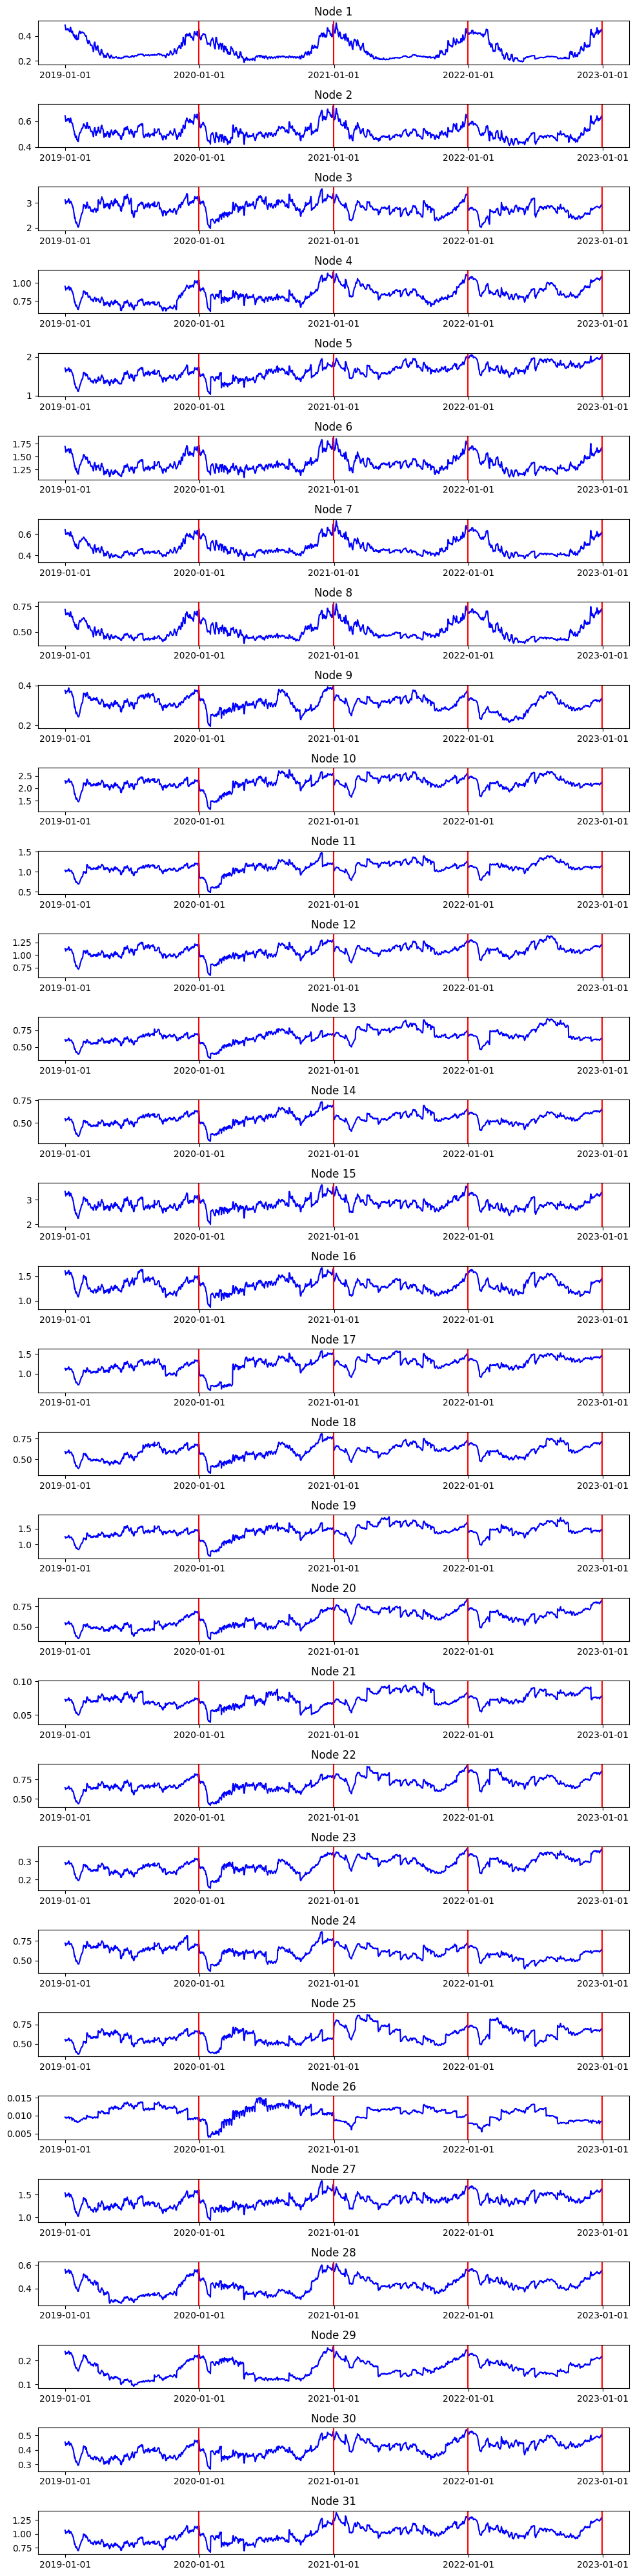

In [4]:
import matplotlib.dates as mdates

# Generate the date range
dates = pd.date_range(start="2019-01-01", end="2022-12-31")

# Create a new figure
plt.figure(figsize=(10, 40))

# Convert pandas dates to matplotlib dates
dates = mdates.date2num(dates)

# List of special dates
special_dates = pd.date_range(start="2019-01-01", end="2022-12-31", freq="Y")
special_dates = mdates.date2num(special_dates)

# Plot each node's time series
for i in range(data_combined_var1.shape[0]):
    # Create a new subplot for each node
    plt.subplot(data_combined_var1.shape[0], 1, i + 1)

    # Plot the time series for this node
    plt.plot_date(dates, data_combined_var1[i, :], "b-")

    # Add a red vertical line at each special date
    for special_date in special_dates:
        plt.axvline(x=special_date, color="r")

    # Optionally set a label for this subplot
    plt.title(f"Node {i+1}")

    # Set major ticks to be the start of each year
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())

    # Format the x-axis labels as year-month-day
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

# Ensure a clean layout
plt.tight_layout()

# Save the plot
plt.savefig(
    "/home/rbmg6-mingze/Projects/Emissions-Prediction/data/processed/time_series_plot.png",
    dpi=300,
)  # Adjust the dpi (dots per inch) as needed

# Show the plot
plt.show()

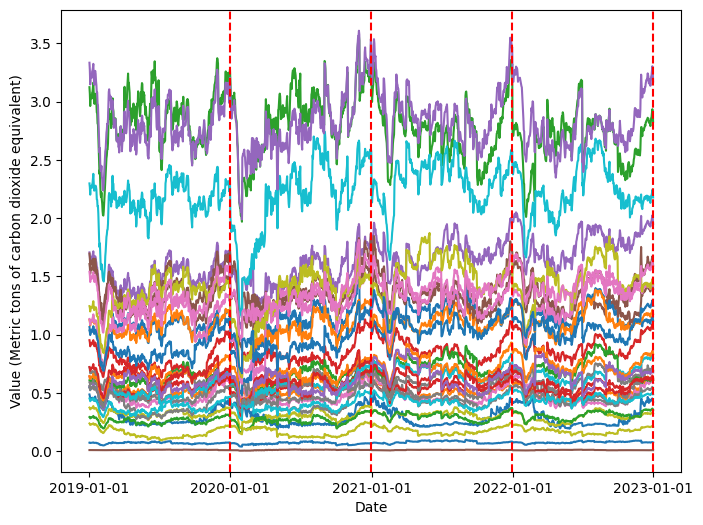

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Generate the date range
dates = pd.date_range(start="2019-01-01", end="2022-12-31")

# Create a new figure
plt.figure(figsize=(8, 6))  # Adjust the figure size according to your preference

# Convert pandas dates to matplotlib dates
dates = mdates.date2num(dates)

# List of special dates
special_dates = pd.date_range(start="2019-01-01", end="2022-12-31", freq="Y")
special_dates = mdates.date2num(special_dates)

# Plot each node's time series
for i in range(data_combined_var1.shape[0]):
    # Plot the time series for this node with different colors
    plt.plot_date(dates, data_combined_var1[i, :], "-")

# Add red vertical lines at each special date
for special_date in special_dates:
    plt.axvline(x=special_date, color="r", linestyle="--")

# Set major ticks to be the start of each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Format the x-axis labels as year-month-day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

# Set the title
# plt.title("Carbon Emissions Trend for Each Province")

# Set the x-axis label
plt.xlabel("Date")

# Set the y-axis label (adjust as needed)
plt.ylabel("Value (Metric tons of carbon dioxide equivalent)")

# Save the plot
plt.savefig(
    "/home/rbmg6-mingze/Projects/Emissions-Prediction/data/processed/combined_trend_plot.png",
    dpi=300,
)  # Adjust the dpi (dots per inch) as needed

# Show the plot (optional)
plt.show()